# PyBer Analysis¶

* From the scatter plot, we can see that the Urban areas have more drivers per city followed by the suburban areas and then lastly the rural areas have the least amount of drivers per city.However, more rides are taken per city in the rural areas compared to the suburban and urban areas, this could be because of the lower ride fares in this area, more analysis needs to be done to investigate why more rides are taken in rural areas
* Ride fares are visibly largest in the Urban areas, followed by the suburban areas and lastly the rural areas. This could also be related to the lower amount of rides in those cities
* There are more drivers in the urban areas, this could be because of the higher fares in these areas also more analysis needs to be done to identify the cause of this
                        
                       

In [256]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load) 
# Combine the data into a single dataset
merged_data = pd.merge(city_df, ride_df, how="left", on=["city", "city"])
# Display the data table for preview
merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

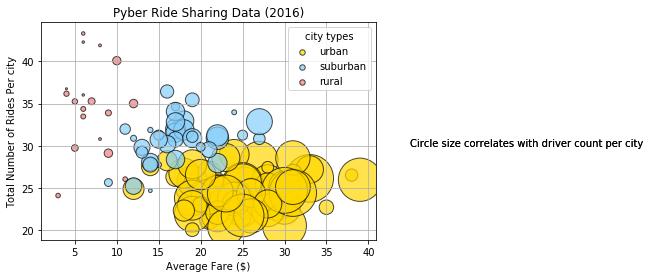

In [257]:
# Obtain the x and y coordinates for each of the three city types
urban_df = merged_data.loc[merged_data["type"] == "Urban", :]
suburban_df = merged_data.loc[merged_data["type"] == "Suburban", :]
rural_df = merged_data.loc[merged_data["type"] == "Rural", :]
city_urban = urban_df.groupby('city').agg({'ride_id':'nunique','fare': 'mean','driver_count':'sum'})
city_suburban = suburban_df.groupby('city').agg({'ride_id':'nunique','fare': 'mean','driver_count':'sum'})
city_rural = rural_df.groupby('city').agg({'ride_id':'nunique','fare': 'mean','driver_count':'sum'})
city_rural
x_urban = city_urban["ride_id"].tolist()
x_suburban = city_suburban["ride_id"].tolist()
x_rural = city_rural["ride_id"].tolist()
y_urban = city_urban["fare"].tolist()
y_suburban = city_suburban["fare"].tolist()
y_rural = city_rural["fare"].tolist()
# Build the scatter plots for each city types
u = city_urban["driver_count"].tolist()

s = city_suburban["driver_count"].tolist()

r = city_rural["driver_count"].tolist()
plt.scatter(x_urban, y_urban, s=u, marker="o", label='urban',facecolors="gold", edgecolors="black",alpha=0.7)
plt.scatter(x_suburban, y_suburban, s=s, marker="o", label='suburban',facecolors="lightskyblue", edgecolors="black",alpha=0.7)
plt.scatter(x_rural, y_rural, s=r, marker="o", label='rural',facecolors="lightcoral", edgecolors="black",alpha=0.7)
plt.grid()

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides Per city")
# Create a legend
lgnd = plt.legend(title = "city types",loc="upper right");
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.text(45,30,"Circle size correlates with driver count per city")
# Incorporate a text label regarding circle size
plt.text(45,30,"Circle size correlates with driver count per city")

# Save Figure
plt.savefig("Images/Bubble_plot.png",dpi=300, bbox_inches = "tight")


## Total Fares by City Type

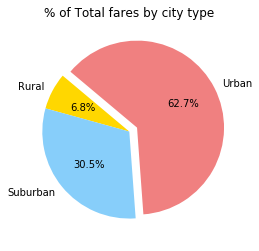

In [258]:
# Calculate Type Percents
fares_city = merged_data.groupby('type').agg({'fare':'sum'})
fares_city["city_type"] = fares_city.index
city_type = fares_city["city_type"]
fare = fares_city["fare"]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
# Build Pie Chart
plt.pie(fare, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("% of Total fares by city type")
# Save Figure
plt.savefig("Images/total_fares.png",dpi=300, bbox_inches = "tight")

## Total Rides by City Type

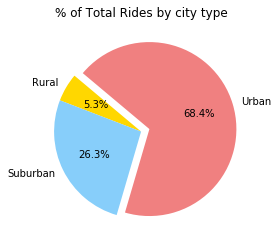

In [259]:
# Calculate Ride Percents
rides_city = merged_data.groupby('type').agg({'ride_id':'count'})
rides_city["city_type"] = rides_city.index
city_type = rides_city["city_type"]
total_rides = rides_city["ride_id"]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
# Build Pie Chart
plt.pie(total_rides, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("% of Total Rides by city type")
# Save Figure
plt.savefig("Images/pie_total_rides.png",dpi=300, bbox_inches = "tight")

## Total Drivers by City Type

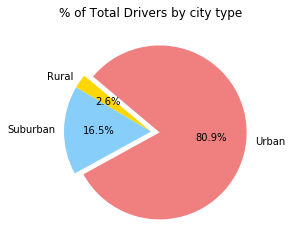

In [260]:
# Calculate Driver Percents

driver_city = merged_data.groupby('city').agg({'driver_count':'max', 'type': 'max'})
driver_city.apply(pd.Series)
driver_city_final = driver_city.groupby('type').agg({'driver_count':'sum'})

driver_city_final["city_type"] = driver_city_final.index
city_type = driver_city_final["city_type"]
total_drivers = driver_city_final["driver_count"]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
 #Build Pie Charts
plt.pie(total_drivers, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("% of Total Drivers by city type")
# Save Figure
plt.savefig("Images/pie_total_drivers.png",dpi=300, bbox_inches = "tight")